<a href="https://colab.research.google.com/github/carolvieirav/Mova-Case-DataAnalysis/blob/main/MOVA_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Clean

In [ ]:
loan = pd.read_csv('/content/lc_loan.csv', encoding='latin1',sep = ",") 

In [9]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_info = pd.read_csv('/content/lending_club_info.csv', encoding='latin1',sep = ",")

In [8]:
loan_info.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [ ]:
loan.dropna(how='all', inplace=True) # Drop rows that all values are missing 

In [10]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,2.885520e+05,2.885520e+05,288552.000000,288552.000000,288552.000000,288552.000000,288552.00000,2.885480e+05,288552.000000,288523.000000,288523.000000,126324.000000,30850.000000,288523.000000,288523.000000,2.885520e+05,288308.000000,288523.000000,288551.000000,288551.000000,288551.000000,288551.000000,288551.000000,288551.000000,288551.000000,288551.000000,288551.000000,288551.000000,288406.000000,49025.000000,288551.0,0.0,0.0,0.0,288522.000000,218275.000000,2.182750e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.182750e+05,0.0,0.0,0.0
mean,9.993291e+06,1.117333e+07,13977.929628,13936.760878,13827.943116,13.723546,424.04315,7.216788e+04,16.848209,0.248684,0.800453,34.606330,77.365251,10.896805,0.121255,1.629523e+04,56.439278,24.427411,3187.590965,3186.362647,12413.873911,12301.913261,9634.055065,2678.453842,0.754367,100.610641,9.495081,3222.969433,0.005621,42.365548,1.0,NaN,NaN,NaN,0.003060,121.982472,1.380025e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.061029e+04,NaN,NaN,NaN
std,1.205803e+07,1.288469e+07,8188.659060,8167.050991,8202.406720,4.369566,242.01685,5.376490e+04,7.840349,0.727199,1.100330,21.713097,31.756719,4.827044,0.435411,2.084707e+04,24.186459,11.439762,5698.607977,5696.985412,8768.609017,8763.164483,7270.840761,2705.111755,5.673619,607.037340,93.732296,5475.378398,0.086459,21.193333,0.0,NaN,NaN,NaN,0.060906,1417.549959,1.528590e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.701059e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.67000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,1.485578e+06,1.730728e+06,7925.000000,7875.000000,7550.000000,10.640000,248.77000,4.500000e+04,11.000000,0.000000,0.000000,16.000000,56.000000,7.000000,0.000000,6.468000e+03,39.300000,16.000000,0.000000,0.000000,5859.830000,5754.135000,4075.820000,948.820000,0.000000,0.000000,0.000000,316.470000,0.000000,25.000000,1.0,NaN,NaN,NaN,0.000000,0.000000,2.796950e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380000e+04,NaN,NaN,NaN
50%,5.626661e+06,6.738102e+06,12000.000000,12000.000000,12000.000000,13.490000,375.04000,6.176752e+04,16.510000,0.000000,0.000000,32.000000,86.000000,10.000000,0.000000,1.185400e+04,58.300000,23.000000,0.000000,0.000000,10376.874918,10269.820000,7982.060000,1828.720000,0.000000,0.000000,0.000000,578.370000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000,8.022800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.310000e+04,NaN,NaN,NaN
75%,9.010280e+06,1.078281e+07,19800.000000,19600.000000,19425.000000,16.290000,555.99000,8.600000e+04,22.350000,0.000000,1.000000,50.000000,103.000000,13.000000,0.000000,2.037800e+04,75.600000,31.000000,3973.195000,3972.640000,16795.151104,16672.625000,13000.000000,3331.445000,0.000000,0.000000,0.000000,3799.375000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000,2.080105e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.13000,7.141778e+06,39

In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [ ]:
loan.describe().columns # using describe method to visualize all numeric columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [ ]:
pd.options.display.float_format = '{:,}'.format
display(loan) # format large numbers to display it as comma seperated numbers.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,"5,000.0","5,000.0","4,975.0",36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,"24,000.0",Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,nan,nan,3.0,0.0,"13,648.0",83.7,9.0,f,0.0,0.0,"5,861.07141425","5,831.78","5,000.0",861.07,0.0,0.0,0.0,Jan-2015,171.62,NaN,Jan-2016,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1077430,1314167,"2,500.0","2,500.0","2,500.0",60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.0",Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0,0.0,Apr-1999,5.0,nan,nan,3.0,0.0,"1,687.0",9.4,4.0,f,0.0,0.0,"1,008.71","1,008.71",456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1077175,1313524,"2,400.0","2,400.0","2,400.0",36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,"12,252.0",Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,nan,nan,2.0,0.0,"2,956.0",98.5,10.0,f,0.0,0.0,"3,003.65364445","3,003.65","2,400.0",603.65,0.0,0.0,0.0,Jun-2014,649.91,NaN,Jan-2016,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1076863,1277178,"10,000.0","10,000.0","10,000.0",36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.0",Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0,0.0,Feb-1996,1.0,35.0,nan,10.0,0.0,"5,598.0",21.0,37.0,f,0.0,0.0,"12,226.3022123","12,226.3","10,000.0","2,209.33",16.97,0.0,0.0,Jan-2015,357.48,NaN,Jan-2015,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1075358,1311748,"3,000.0","3,000.0","3,000.0",60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.0",Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,nan,15.0,0.0,"27,783.0",53.9,38.0,f,766.9,766.9,"3,242.17","3,242.17","2,233.1","1,009.07",0.0,0.0,0.0,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66247,8646770,10418733,"20,000.0","20,000.0","20,000.0",36 months,7.62,623.23,A,A3,NaN,NaN,RENT,"62,00

### Outlier Treatment (IQR Method)

In [ ]:
loan.shape

(66252, 74)

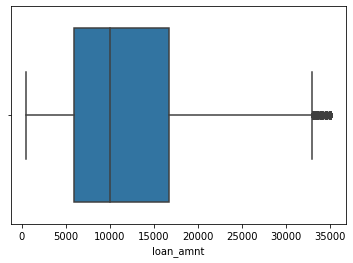

In [ ]:
sns.boxplot(data=loan,x=loan['loan_amnt']) # visualize outliers with boxplot

In [ ]:
def remove_outlier_IQR(df):

  ''' 

  Function to implement IQR method
  
  '''
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
  return df_final

  loan = remove_outlier_IQR(loan)

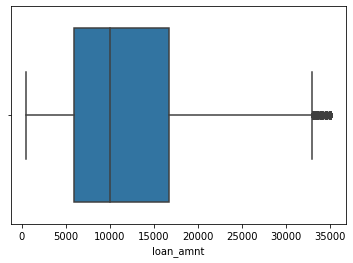

In [ ]:
sns.boxplot(data=loan,x=loan['loan_amnt'])

# Exploratory Analysis

In [12]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [13]:
loan.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,1.000000,0.998023,0.075757,0.079857,0.089678,-0.041962,0.045680,0.024510,0.138724,0.080148,-0.109956,-0.038303,-0.150918,0.100323,0.126088,0.038034,-0.004699,0.071906,0.528494,0.528611,-0.281289,-0.271579,-0.280761,-0.142895,-0.042125,-0.063196,-0.032101,-0.084259,0.072661,0.035355,NaN,NaN,NaN,NaN,0.032034,0.053262,0.009820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031687,NaN,NaN,NaN
member_id,0.998023,1.000000,0.078453,0.082707,0.092967,-0.039043,0.048554,0.024793,0.139411,0.080337,-0.111875,-0.038375,-0.142713,0.100531,0.127491,0.038376,-0.002962,0.071800,0.530329,0.530445,-0.278948,-0.268801,-0.278930,-0.140218,-0.043064,-0.063222,-0.032291,-0.082499,0.072457,0.035131,NaN,NaN,NaN,NaN,0.032183,0.053145,0.009965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031848,NaN,NaN,NaN
loan_amnt,0.075757,0.078453,1.000000,0.997600,0.990710,0.196066,0.949107,0.363339,0.068790,0.010297,-0.018674,-0.034750,0.032192,0.207382,-0.067145,0.319169,0.109541,0.245175,0.456053,0.455997,0.772269,0.770403,0.658204,0.705898,0.043739,0.125608,0.076848,0.336067,-0.004599,-0.069280,NaN,NaN,NaN,NaN,0.010108,-0.016455,0.324147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.287582,NaN,NaN,NaN
funded_amnt,0.079857,0.082707,0.997600,1.000000,0.993618,0.197267,0.952650,0.362312,0.070816,0.011035,-0.019738,-0.034798,0.032790,0.208477,-0.066505,0.318617,0.111421,0.244759,0.459812,0.459759,0.772393,0.771022,0.658328,0.706037,0.043395,0.125300,0.076691,0.336198,-0.004284,-0.069249,NaN,NaN,NaN,NaN,0.010388,-0.016455,0.324143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.287579,NaN,NaN,NaN
funded_amnt_inv,0.089678,0.092967,0.990710,0.993618,1.000000,0.199171,0.945536,0.358125,0.076649,0.011776,-0.030510,-0.026320,0.125585,0.209224,-0.064522,0.313032,0.114678,0.244695,0.464653,0.464616,0.765498,0.775385,0.651334,0.703239,0.037018,0.121997,0.071702,0.334678,-0.003457,-0.069169,NaN,NaN,NaN,NaN,0.010806,-0.016447,0.324102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.287540,NaN,NaN,NaN
int_rate,-0.041962,-0.039043,0.196066,0.197267,0.199171,1.000000,0.188542,-0.031468,0.170632,0.085027,0.206780,-0.045226,0.040202,0.023451,0.052331,-0.002572,0.360609,-0.020558,0.126706,0.126723,0.170358,0.173089,0.008325,0.498926,0.060142,0.137183,0.077688,0.100829,0.017847,-0.006537,NaN,NaN,NaN,NaN,0.028988,-0.000548,-0.124891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.165885,NaN,NaN,NaN
installment,0.045680,0.048554,0.949107,0.952650,0.945536,0.188542,1.000000,0.359566,0.064367,0.020534,0.003106,-0.038028,0.017662,0.200660,-0.058492,0.307110,0.137922,0.225129,0.345019,0.345001,0.787019,0.784931,0.703292,0.634031,0.052757,0.118790,0.074427,0.326871,-0.003172,-0.068743,NaN,NaN,NaN,NaN,0.011976,-0.016710,0.288584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261261,NaN,NaN,NaN
annual_inc,0.024510,0.024793,0.363339,0.362312,0.358125,-0.031468,0.359566,1.000000,-0.180808,0.060876,0.058032,-0.057137,-0.107431,0.163486,-0.015938,0.339257,0.030567,0.237805,0.139557,0.139555,0.303957,0.301661,0.287873,0.206785,0.020540,0.020941,0.015179,0.153870,0.002001,-0.080678,NaN,NaN,NaN,NaN,0.017686,0.003293,0.506393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305469,NaN,NaN,NaN
dti,0.138724,0.139411,0.068790,0.070816,0.076649,0.170632,0.064367,-0.180808,1.000000,-0.001559,-0.016192,0.018945,0.083515,0.3

In [11]:
def info(col_name):

  '''
  Funtion to visualize the description of each column in the 'loan' DataFrame
  '''
  
  print(loan_info.loc[col_name]['Description'])



## Univariate Analysis

loan_status

In [14]:
loan.loan_status.nunique()

9

In [15]:
loan.loan_status.value_counts()

Fully Paid                                             139516
Current                                                109785
Charged Off                                             30610
Late (31-120 days)                                       3336
Does not meet the credit policy. Status:Fully Paid       1988
In Grace Period                                          1627
Does not meet the credit policy. Status:Charged Off       761
Late (16-30 days)                                         553
Default                                                   376
Name: loan_status, dtype: int64

In [16]:
# dividing loans status between "defaulted" or "not defaulted" by assigning a binary atribute in a python dictionary 
# 0 means Not Defaulted, 1 means Defaulted.
loan_status_dic ={'Late (31-120 days)':1,'Late (16-30 days)':1,'Default':1,'Charged Off':1,"Does not meet the credit policy. Status:Charged Off":1,'Current':0,'Fully Paid':0,'In Grace Period':0, "Does not meet the credit policy. Status:Fully Paid":0}


In [17]:
loan['loan_status_bi'] = loan['loan_status'].map(loan_status_dic)

In [18]:
loan.loan_status_bi.value_counts()

0    252916
1     35636
Name: loan_status_bi, dtype: int64

In [22]:
sum(loan.loan_status_bi==1)

35636

In [23]:
sum(loan.loan_status_bi==0)

252916

loan_amnt

In [24]:
loan.loan_amnt.describe()

count    288552.000000
mean      13977.929628
std        8188.659060
min         500.000000
25%        7925.000000
50%       12000.000000
75%       19800.000000
max       35000.000000
Name: loan_amnt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


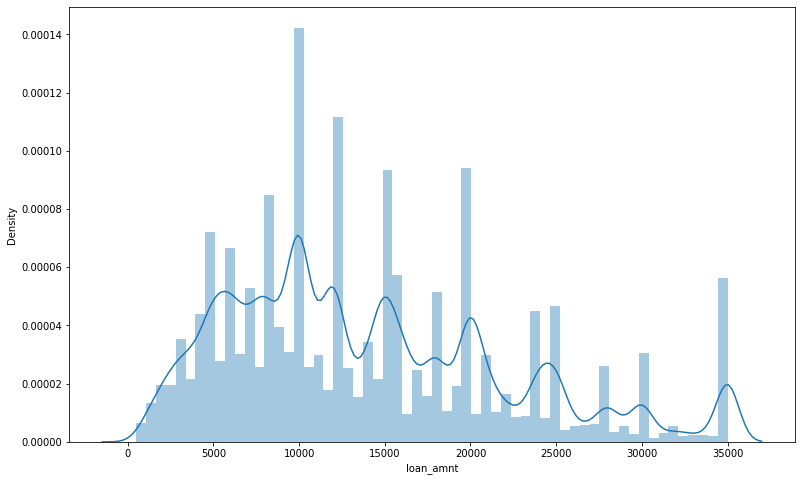

In [25]:
plt.figure(figsize=(13,8))
sns.distplot(loan["loan_amnt"],kde=True,bins=60);

Returns on Investment of LendingClub


In [96]:
x = loan.groupby("loan_status")["total_pymnt"].sum()
y = loan.groupby("loan_status")["funded_amnt"].sum()

z = 100*(x-y)/y
deficit= z[2]
deficit # only considere "default"

-41.15944990778396

In [97]:
fully_paid = z[5]
fully_paid #only considere "fully paid"

16.920524521552416

In [98]:
current = z[1]+z[6]+z[7]+z[8]
current # only considere "current", "in grace period" and "late"

-115.02989541767454

## Multivariate Analysis

Consider multiple variables at a time to find the relationship among them and gain insights from it.

Loan Status and Loan Amount

In [31]:
loan.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,30610.0,14306.619569,8371.001953,900.0,8000.00,12000.0,20000.0,35000.0
Current,109785.0,15241.387712,8368.052421,1000.0,8975.00,14125.0,20000.0,35000.0
Default,376.0,15828.789894,8430.590367,1000.0,9768.75,15000.0,21000.0,35000.0
Does not meet the credit policy. Status:Charged Off,761.0,9527.233903,6404.598723,500.0,5000.00,7750.0,12000.0,25000.0
Does not meet the credit policy. Status:Fully Paid,1988.0,8853.231891,6163.442950,500.0,4000.00,7200.0,12000.0,25000.0
Fully Paid,139516.0,12929.636207,7835.613892,500.0,7000.00,11200.0,17800.0,35000.0
In Grace Period,1627.0,15999.108789,8570.229640,1000.0,9750.00,15000.0,21000.0,35000.0
Late (16-30 days),553.0,16426.084991,8856.466983,1000.0,10000.00,15000.0,22000.0,35000.0
Late (31-120 days),3336.0,15692.685851,8377.719014,1000.0,9600.00,14412.5,20500.0,35000.0


In [30]:
loan.groupby("loan_status_bi")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status_bi,,,,,,,,
0,252916.0,13920.818177,8158.629283,500.0,7800.0,12000.0,19700.0,35000.0
1,35636.0,14383.261309,8387.652304,500.0,8000.0,12250.0,20000.0,35000.0


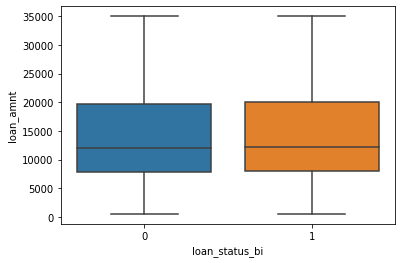

In [29]:
sns.boxplot(x="loan_status_bi",y="loan_amnt",data=loan);
# shows the relation between the amount of money borrowed and the default status of the loan

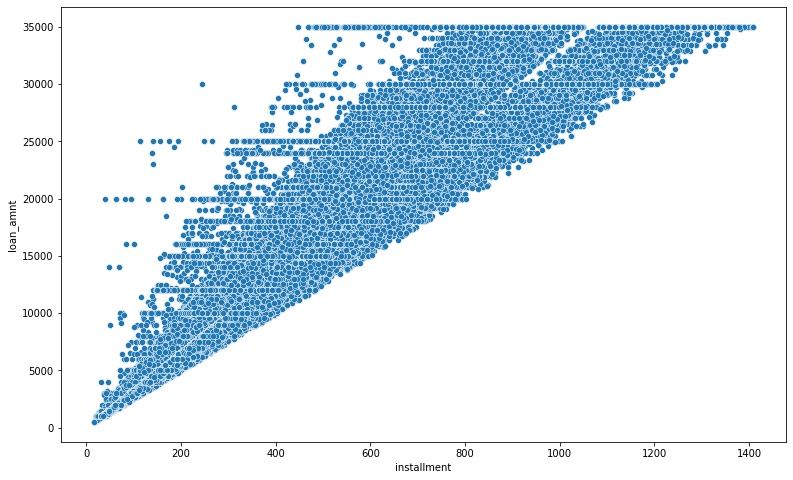

In [26]:
plt.figure(figsize=(13,8))
sns.scatterplot(x="installment",y="loan_amnt",data=loan);

# "Installments" are the monthly payment owed by the borrower if the loan originates.
# the following scatter plot show how much installments the borrower have to pay monthly for each listed loan amount.


Grade and Interest Rate

In [100]:
loan.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [102]:
loan.int_rate.describe()

count    288552.000000
mean         13.723546
std           4.369566
min           5.420000
25%          10.640000
50%          13.490000
75%          16.290000
max          26.060000
Name: int_rate, dtype: float64